## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = list(('0 - T-shirt', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot'))


In [25]:
print(class_names)

['0 - T-shirt', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot']


###4. Find no.of samples in training and test dataset

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
y_test.shape

(10000,)

###5. Find dimensions of an image in the dataset

In [29]:
x_train[0].shape

(28, 28)

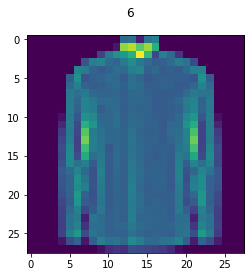

In [19]:
#Lets print the image as well
import matplotlib.pyplot as plt

img_num = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[img_num])
plt.suptitle(str(y_test[img_num]))
plt.show()

We can see it is colored image, but in actual it is not colored. It is showing heatmap of that image thats why we see color here. Shape gives correct picture of dimensions which is of 28*28 

### 6. Verify if existing labels/Classes are correct 

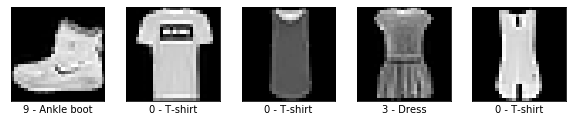

In [28]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

Here we can see that labels/classes are correct

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [31]:
y_train[0]

9

In [32]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [33]:
y_test[0]

9

In [34]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#x_train_normalized= tf.keras.utils.normalize(x_train)
x_train_normalized= (x_train)/255


In [47]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [48]:
x_train_normalized[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [0]:
#x_test_normalized= tf.keras.utils.normalize(x_test)
x_test_normalized= (x_test)/255

In [50]:
x_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  67,   0,
          0,   0,   0,  50,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226, 247, 237,
        255, 255, 255, 247, 238, 235, 172,  72,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 137, 239, 252, 243, 234, 229, 238,
        244, 246, 240, 230, 232, 239, 248, 251, 194,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 102, 255, 231, 228, 227, 228, 233, 230,
        230, 229, 228, 232, 232, 231, 227, 224, 252, 179,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 233, 241, 229, 231, 255, 255, 238, 231,
        227, 238, 246, 228, 230, 227, 234, 235, 229, 241,  20,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 248, 241, 231, 255, 149,  47, 252, 228,
        255, 242, 216, 238, 232, 255, 228, 220, 234, 250,  54,   0,   0,
          0,   0],
       [  

In [51]:
x_test_normalized[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
from tensorflow.keras.backend import expand_dims

In [0]:
x_train_n = expand_dims(x_train_normalized,axis=-1).numpy()

In [62]:
x_train_n.shape

(60000, 28, 28, 1)

In [0]:
x_test_n = expand_dims(x_test_normalized,axis=-1).numpy()

In [64]:
x_test_n.shape

(10000, 28, 28, 1)

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [70]:
clear_session()

#Initialize model, reshape & normalize data
model = Sequential()

#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))
#normalize data
model.add(BatchNormalization())

#Add second convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization())

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(x_train_n,trainY,          
          validation_data=(x_test_n,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.4083 - accuracy: 0.8607 - val_loss: 0.3888 - val_accuracy: 0.8652
Epoch 2/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2385 - accuracy: 0.9121 - val_loss: 0.2882 - val_accuracy: 0.9018
Epoch 3/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1885 - accuracy: 0.9304 - val_loss: 0.2802 - val_accuracy: 0.9091
Epoch 4/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1476 - accuracy: 0.9456 - val_loss: 0.3328 - val_accuracy: 0.9031
Epoch 5/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.1135 - accuracy: 0.9578 - val_loss: 0.3519 - val_accuracy: 0.8939
Epoch 6/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0889 - accuracy: 0.9679 - val_loss: 0.5474 - val_accuracy: 0.9017
Epoch 7/10
60000/60000 [====================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [71]:
clear_session()

#Initialize model, reshape & normalize data
model2 = Sequential()

#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))
#normalize data
model2.add(BatchNormalization())

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model2.add(BatchNormalization())

#Add MaxPooling layer
model2.add(MaxPool2D(pool_size=(2,2)))

#Add another dropout layer
model2.add(Dropout(0.25))

#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Output layer
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
model2.fit(x_train_n,trainY,          
          validation_data=(x_test_n,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3885 - accuracy: 0.8622 - val_loss: 0.2873 - val_accuracy: 0.8998
Epoch 2/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2582 - accuracy: 0.9047 - val_loss: 0.2592 - val_accuracy: 0.9064
Epoch 3/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2148 - accuracy: 0.9208 - val_loss: 0.2522 - val_accuracy: 0.9077
Epoch 4/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1865 - accuracy: 0.9303 - val_loss: 0.2553 - val_accuracy: 0.9159
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1584 - accuracy: 0.9406 - val_loss: 0.2587 - val_accuracy: 0.9151
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1370 - accuracy: 0.9485 - val_loss: 0.2658 - val_accuracy: 0.9125
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [72]:
train_score1 = model.evaluate(x_train_n,trainY)
test_score1 = model.evaluate(x_test_n,testY)

train_score2 = model2.evaluate(x_train_n,trainY)
test_score2 = model2.evaluate(x_test_n,testY)
print('training score of first model: ',train_score1)
print('testing score of first model: ',test_score1)
print('training score of second model: ',train_score2)
print('testing score of second model:',test_score2)


10000/10000 [==============================] - 1s 83us/sample - loss: 0.2894 - accuracy: 0.9187
training score of first model:  [0.04115180188237767, 0.98553336]
testing score of first model:  [0.4654413640215993, 0.9091]
training score of second model:  [0.05735237702747496, 0.98036665]
testing score of second model: [0.2894219238117337, 0.9187]


####14. Verify performance of your model selectively 

In [0]:
import numpy as np
predictions = model2.predict(x_train_n)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

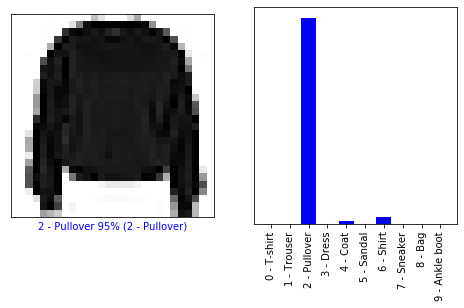

In [94]:
#Replace value of i with other index to check other product
i = 7
color='blue'
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True, vertical_flip=True, rotation_range=25)

In [0]:
datagen.fit(x_train_n)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

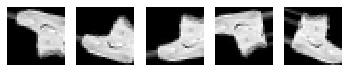

In [92]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_n[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

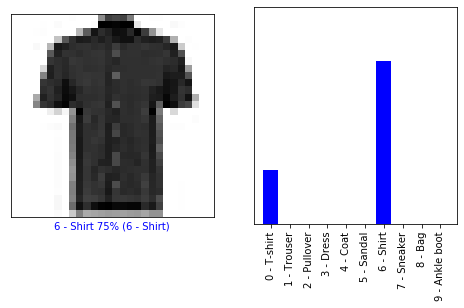

In [98]:
#Replace value of i with other index to check other product in test
predictions_test = model2.predict(x_test_n)
i = 40
color='blue'
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions_test[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_test[i],  y_test)
plt.show()